In [288]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers, losses, metrics, regularizers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load_Normalized_WineData()
winequality 의 정보가 담긴 csv를 읽어오고, MinMaxScaler()를 이용해 normalization 시킨 후, 조건에 맞게 split 시키는 함수입니다.
HW #2 와 마찬가지로 x에는 input정보들이 담긴 1번 째부터 11번 째의 col 에 대한 값들이 저장되어 있으며, y에는 마지막 col에 대한 output 값들이 저장되어 있습니다.
split이 마친 dataset은 tuple 형태로 return 하도록 하였습니다.

# build_model()
regularization 여부를 parameter로 받아온 후 조건에 맞는 NN를 만들어 주는 함수입니다. winequality.names의 7. Attribute information: 에 의해 input shape는 11로 결정되고, output shape는 0부터 10까지의 값으로 표현되므로 1로 하였습니다. 추가적으로 Regression 을 하는 모델이므로 activation function은 linear function으로 해주고, metrics는 mae를 받아오도록 하였습니다.
dafault 값을 regularization 하지 않은 경우로 하기 위해서 if 구문의 조건으로 not 을 붙였으며, else 구문부터 regularization 을 할 경우에 대해 layer를 구성하였습니다.
문제 조건에서는 모든 layer에 regularization 을 적용하라고 하였지만, 일반적으로 예측 성능을 위해서 output layer에는 regularization 을 적용하지 않으므로 이 경우에 대해서도 분석하는 line을 추가하였습니다.

# plot_MAE()
model.fit이 실행되고 나온 history type 을 parameter로 받아서 학습을 마친 결과로 얻은 train_mae와 val_mae를 각 epoch 별로 learning curve를 출력하는 함수입니다.

In [289]:
## Printing variable info func
def getInfo(val):
    print(type(val))
    try:
        print(val)
        if str(type(val)) == "<class 'numpy.ndarray'>" or \
           str(type(val)) == "<class 'pandas.core.frame.DataFrame'>":
            print(val.shape)
        else:
            print(len(val))
    except Exception:
        pass


## CSV data loading func
def load_Normalized_WineData(path="./kaggle/wine_quality/winequality-red.csv") -> tuple:
    data = pd.read_csv(path)
    x = data[data.columns[:-1]].values
    # getInfo(x)
    y = data[data.columns[-1]].values
    # getInfo(y)

    # Data normalization
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    # getInfo(x)

    # Test Validation Data split
    x_train = x[:1000]
    y_train = y[:1000]
    x_test = x[1000:]
    y_test = y[1000:]
    return (x_train, y_train), (x_test, y_test)


## NN Building func
def build_model(regularization=False):
    if not regularization:
        print('w/o Regularization')
        model = models.Sequential()
        model.add(layers.Dense(512, input_shape=(11,)))    # train_data.shape[1] = (1000, 11)[1] = len(input_col) = 11
        model.add(layers.Dense(512))
        model.add(layers.Dense(512))
        model.add(layers.Dense(1))     # According to winequality.names, quality score can be a value between 0 and 10
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model
    else:
        print('w/ Regularization')
        model = models.Sequential()
        model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape=(11,)))
        model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
        model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
        
        # output layer regularized case
        # model.add(layers.Dense(1, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

        # output layer not-regularized case
        model.add(layers.Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model


## Plotting func
def plot_MAE(h):
    plt.plot(h.history['mae'])
    plt.plot(h.history['val_mae'])
    plt.title('Learning curves of MAE in training set & valildation set')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend(['mae', 'val_mae'], loc=0)
    plt.show()

### Main Loop

In [290]:
## Main loop

# Data load
(train_data, train_targets), (test_data, test_targets) = load_Normalized_WineData()

# w/o regularization
# model = build_model(regularization=False)

# w/ regularization
model = build_model(regularization=True)

history = model.fit(train_data, train_targets, epochs=500, validation_split=0.2, verbose=0)

w/ Regularization


2023-04-16 15:42:27.308604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-16 15:42:27.833693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 7ms/step - loss: 0.5414 - mae: 0.5129
train_mae = 0.5023
val_mae = 0.5455
test_mae = 0.5129


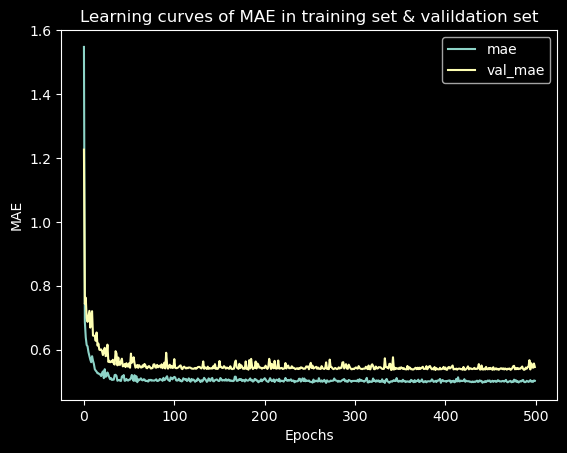

In [291]:
# Collecting the validation errors
train_mae = history.history['mae'][-1]
# getInfo(train_mae)
val_mae = history.history['val_mae'][-1]
# getInfo(val_mae)
test_loss, test_mae = model.evaluate(test_data, test_targets)   # Single value
# getInfo(test_mae)

print("train_mae =", round(train_mae, 4))
print("val_mae =", round(val_mae, 4))
print("test_mae =", round(test_mae, 4))

# visualization of mae & val_mae
plot_MAE(history)

앞에서부터 10개 가져온 test sample을 모델에 넣고 나온 값을, test_targets 의 shape인 (10,) 에 맞게 reshape 해주었고 y_predict라고 하였습니다.
그리고 실제 결과값인 test_targets의 값도 앞에서부터 10개 가져온 후, y_real이라고 해주었습니다.

이 둘을 비교하기 위해서 
1. iterable 한 y_predict 와 y_real 을 zip으로 묶고, 
2. 이것의 각각의 element인 predict와 real으로 각각의 값을 빼준 다음 실제값의 element인 real로 나누어주어 오차를 계산 한 후,
3. 오차율을 소수점 4자리로 나타내었습니다.

In [292]:
# Comparing the prediction results of the first 10 samples
y_predict = model.predict(test_data[:10]).reshape(10,)  # predicted values
getInfo(y_predict)
y_real = test_targets[:10]                              # real output values
getInfo(y_real)

# Error calculations
err = [str(round(100*abs(predict-real)/real, 4)) + "%" for predict, real in zip(y_predict, y_real)]
getInfo(err)

1/1 [==============================] - 0s 40ms/step
<class 'numpy.ndarray'>
[6.1998816 6.102873  6.4664965 6.491866  5.7230268 6.491866  6.4664965
 6.4593816 6.3444076 5.840548 ]
(10,)
<class 'numpy.ndarray'>
[7 7 7 7 5 7 7 7 7 5]
(10,)
<class 'list'>
['11.4303%', '12.8161%', '7.6215%', '7.2591%', '14.4605%', '7.2591%', '7.6215%', '7.7231%', '9.3656%', '16.811%']
10


2023-04-16 15:43:56.973105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [293]:
np.mean([100*abs(predict-real)/real for predict, real in zip(y_predict, y_real)])


10.236765725272042